In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import os
print(os.listdir("./EPA_DATA"))

['OZONE_AGG.csv', 'gases_aggregation.csv']


In [4]:
data = pd.read_csv('./EPA_DATA/gases_aggregation.csv',encoding= 'unicode_escape')
data['year_month'] =  pd.to_datetime(data['year_month'])
data = data.set_index("year_month")
data = data.sort_values(by=['year_month'])
data.head(10)

County_Name    State_Name         NO        CO        so2  \
year_month                                                                
1980-01-01           York  Pennsylvania  23.222943  1.459199  20.904450   
1980-01-01        Fairfax      Virginia  25.825542  1.235902  23.895699   
1980-01-01      Lancaster  Pennsylvania  23.134795  1.682240  16.570389   
1980-01-01      St. Clair      Michigan  10.544200  3.196778   9.178714   
1980-01-01          Ector         Texas  14.605530  0.460072   1.551422   
1980-01-01     Burlington    New Jersey  23.025045  3.149511  22.213931   
1980-01-01         Harris         Texas  28.088187  0.809961   7.744984   
1980-01-01  San Francisco    California  30.440226  2.567384   1.943304   
1980-01-01         Fresno    California  29.093604  1.011142   0.902594   
1980-01-01           Erie      New York  17.280696  0.815336  19.729413   

               Ozone  
year_month            
1980-01-01  0.009776  
1980-01-01  0.006141  
1980-01-01  0.007055  
1980-01-01  0.009992  
1980-01-01  0.009046  
1980-01-01  0.015110  
1980-01-01  0.013820  
1980-01-01  0.003882  
1980-01-01  0.016265  
1980-01-01  0.011123

In [26]:
co_data = data[data.County_Name=='Sacramento'].sort_values(by=['year_month'])[['CO']]
co_data.head()

CO
year_month          
1980-01-01  1.134529
1980-02-01  0.974255
1980-03-01  0.611695
1980-04-01  0.520621
1980-05-01  0.454460

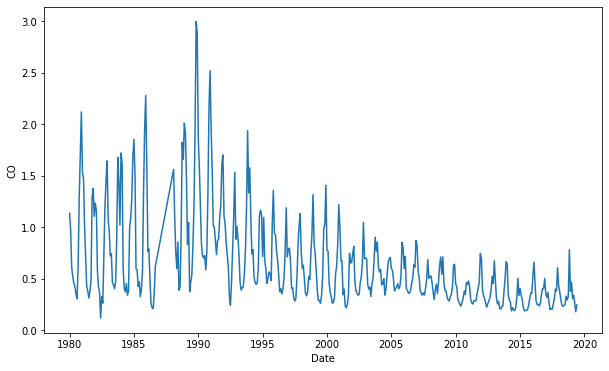

In [27]:
plt.xlabel('Date')
plt.ylabel('CO')
plt.plot(co_data)

In [28]:
rolmean = co_data.rolling(window=12).mean()
rolstd = co_data.rolling(window=12).std()
print(rolmean,rolstd)

                  CO
year_month          
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
...              ...
2019-02-01  0.345168
2019-03-01  0.348166
2019-04-01  0.349697
2019-05-01  0.345342
2019-06-01  0.345782

[459 rows x 1 columns]                   CO
year_month          
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
...              ...
2019-02-01  0.152130
2019-03-01  0.151574
2019-04-01  0.150537
2019-05-01  0.154997
2019-06-01  0.154676

[459 rows x 1 columns]


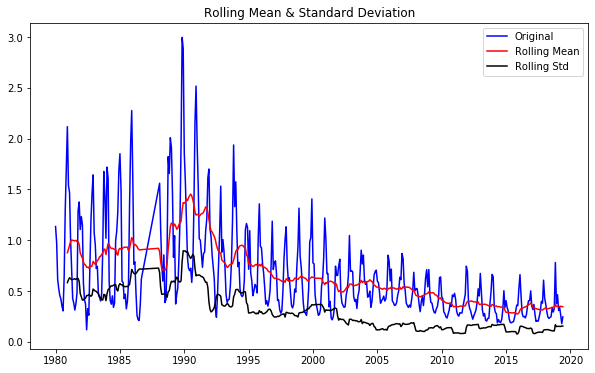

In [29]:
#Plot rolling statistics
orig = plt.plot(co_data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [30]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(co_data['CO'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)


Results of Dickey Fuller Test:
Test Statistic                  -1.616821
p-value                          0.474396
#Lags Used                      13.000000
Number of Observations Used    445.000000
Critical Value (1%)             -3.445131
Critical Value (5%)             -2.868057
Critical Value (10%)            -2.570241
dtype: float64


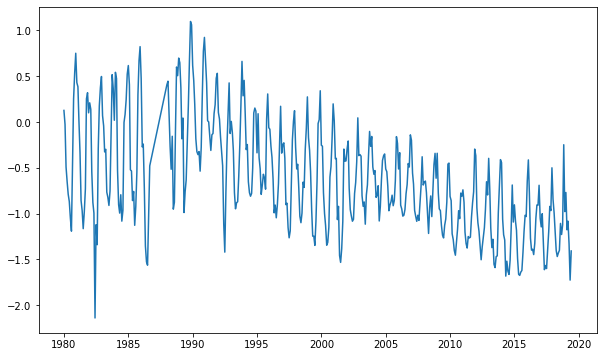

In [94]:
indexedDataset_logScale = np.log(co_data)
plt.plot(indexedDataset_logScale)

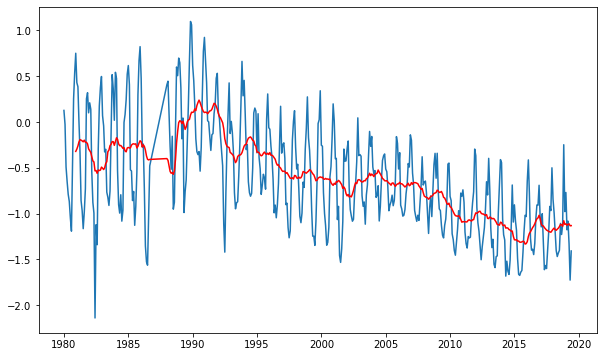

In [95]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')


In [96]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

CO
year_month          
1980-12-01  1.071401
1981-01-01  0.725979
1981-02-01  0.646022
1981-03-01  0.238073
1981-04-01 -0.140526
1981-05-01 -0.658940
1981-06-01 -0.761196
1981-07-01 -0.948328
1981-08-01 -0.779880
1981-09-01 -0.507631

In [97]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['CO'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

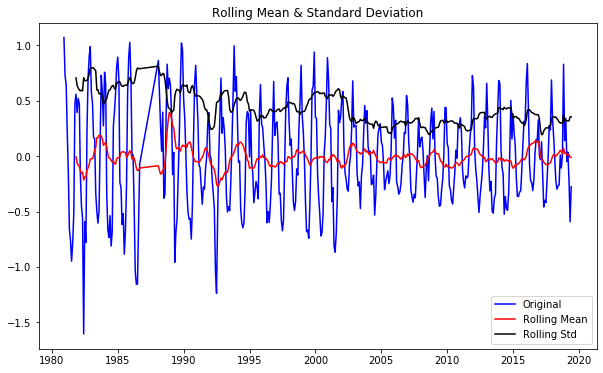

Results of Dickey Fuller Test:
Test Statistic                -6.979571e+00
p-value                        8.258758e-10
#Lags Used                     1.500000e+01
Number of Observations Used    4.320000e+02
Critical Value (1%)           -3.445578e+00
Critical Value (5%)           -2.868254e+00
Critical Value (10%)          -2.570346e+00
dtype: float64


In [98]:
test_stationarity(datasetLogScaleMinusMovingAverage)


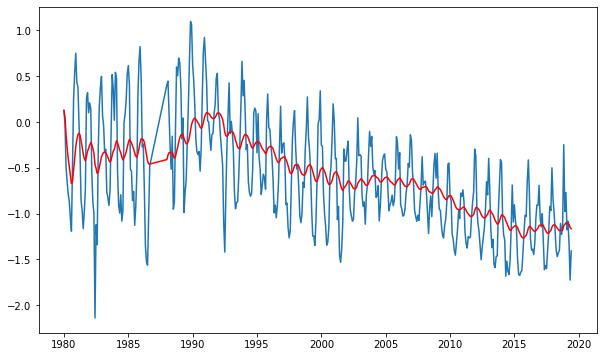

In [99]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

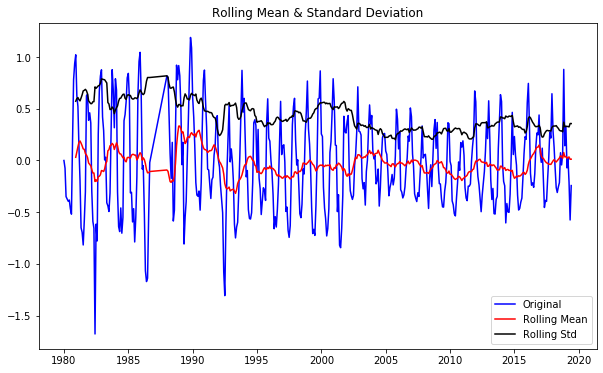

Results of Dickey Fuller Test:
Test Statistic                  -4.630400
p-value                          0.000113
#Lags Used                      13.000000
Number of Observations Used    445.000000
Critical Value (1%)             -3.445131
Critical Value (5%)             -2.868057
Critical Value (10%)            -2.570241
dtype: float64


In [100]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

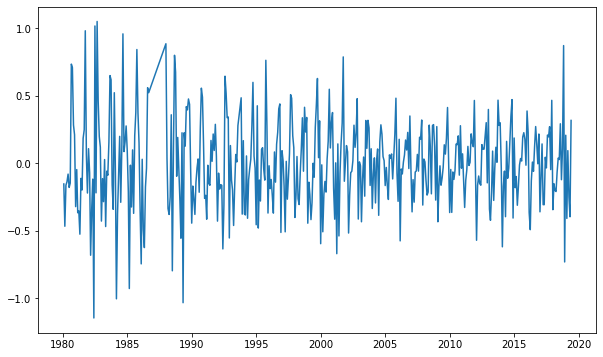

In [101]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)


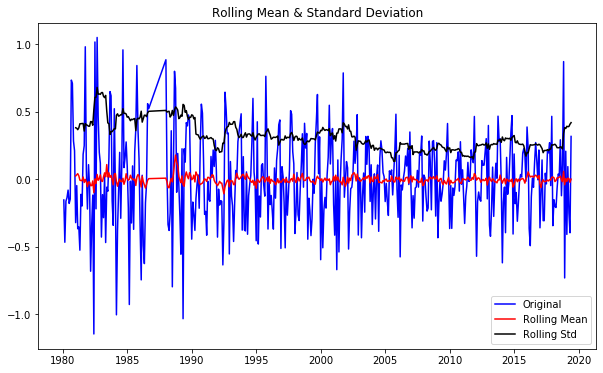

Results of Dickey Fuller Test:
Test Statistic                -1.766501e+01
p-value                        3.667133e-30
#Lags Used                     9.000000e+00
Number of Observations Used    4.480000e+02
Critical Value (1%)           -3.445031e+00
Critical Value (5%)           -2.868013e+00
Critical Value (10%)          -2.570218e+00
dtype: float64


In [102]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

/anaconda3/envs/hw-1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.
/anaconda3/envs/hw-1/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/anaconda3/envs/hw-1/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by pass

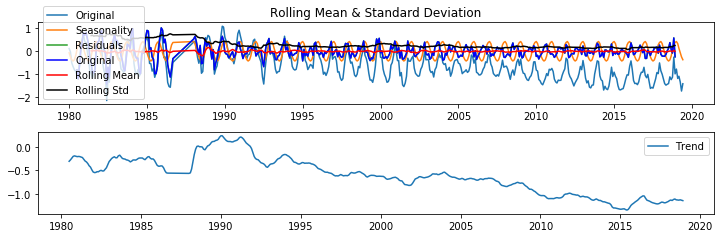

Results of Dickey Fuller Test:
Test Statistic                -9.553523e+00
p-value                        2.534457e-16
#Lags Used                     1.500000e+01
Number of Observations Used    4.310000e+02
Critical Value (1%)           -3.445614e+00
Critical Value (5%)           -2.868269e+00
Critical Value (10%)          -2.570354e+00
dtype: float64


In [103]:
decomposition = seasonal_decompose(indexedDataset_logScale,freq=12) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
decomposedLogData = indexedDataset_logScale.copy()
decomposedLogData['CO'] = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

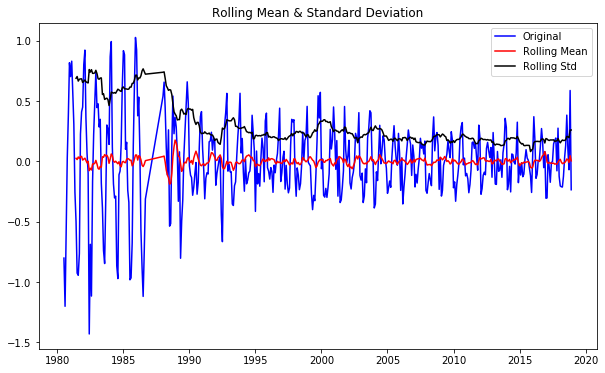

Results of Dickey Fuller Test:
Test Statistic                -9.553523e+00
p-value                        2.534457e-16
#Lags Used                     1.500000e+01
Number of Observations Used    4.310000e+02
Critical Value (1%)           -3.445614e+00
Critical Value (5%)           -2.868269e+00
Critical Value (10%)          -2.570354e+00
dtype: float64


In [104]:
decomposedLogData = indexedDataset_logScale.copy()
decomposedLogData['CO'] = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


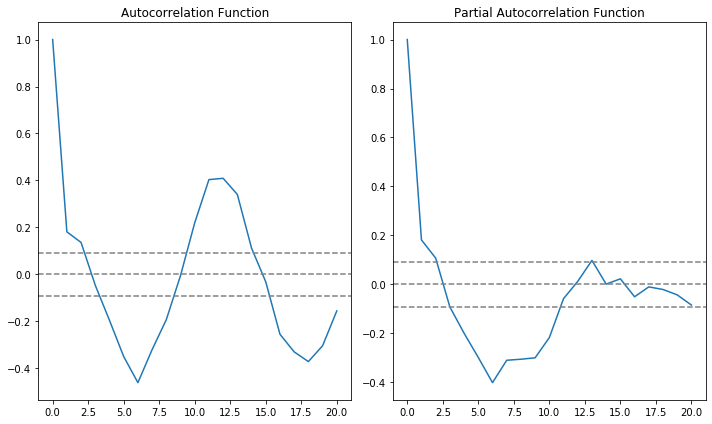

In [105]:
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


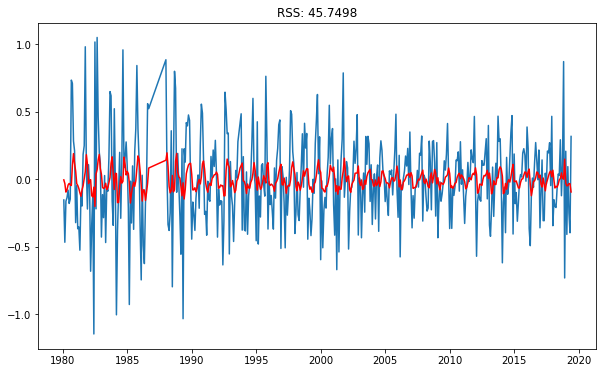

In [106]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['CO'])**2))
print('Plotting AR model')

/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA model


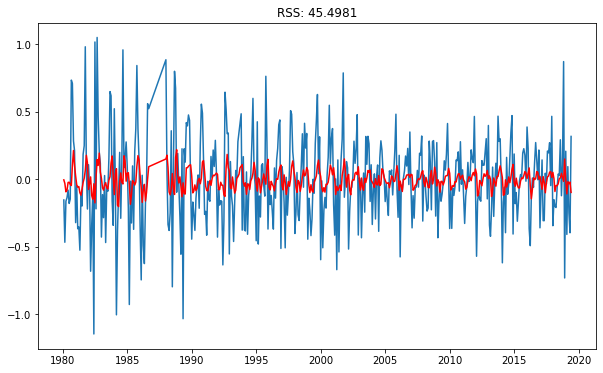

In [107]:
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['CO'])**2))
print('Plotting MA model')


/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA model


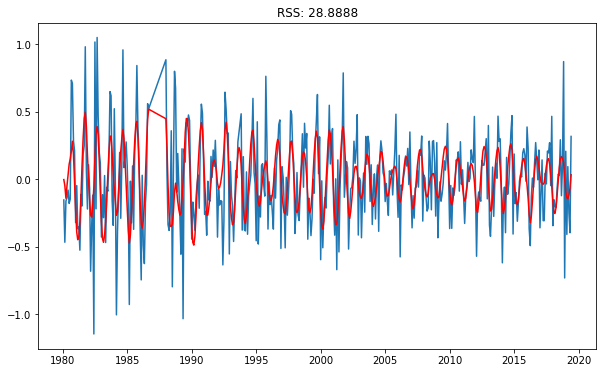

In [108]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['CO'])**2))
print('Plotting ARIMA model')

In [109]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

year_month
1980-02-01   -0.001401
1980-03-01   -0.046373
1980-04-01   -0.139675
1980-05-01   -0.046149
1980-06-01    0.036761
dtype: float64


In [110]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

year_month
1980-02-01   -0.001401
1980-03-01   -0.047774
1980-04-01   -0.187449
1980-05-01   -0.233598
1980-06-01   -0.196837
                ...   
2019-02-01   -0.280242
2019-03-01   -0.423518
2019-04-01   -0.537868
2019-05-01   -0.602452
2019-06-01   -0.567825
Length: 458, dtype: float64


In [111]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['CO'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

year_month
1980-01-01    0.126218
1980-02-01    0.124817
1980-03-01    0.078444
1980-04-01   -0.061231
1980-05-01   -0.107380
dtype: float64

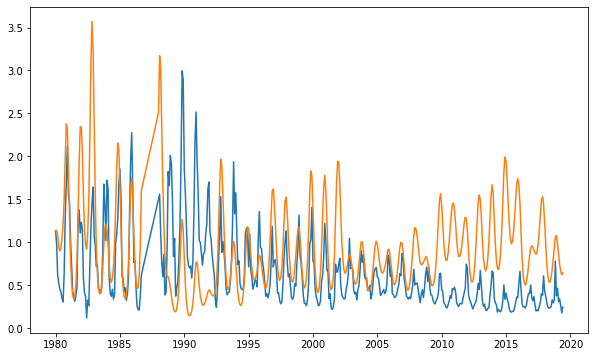

In [112]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(co_data)
plt.plot(predictions_ARIMA)

/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/anaconda3/envs/hw-1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


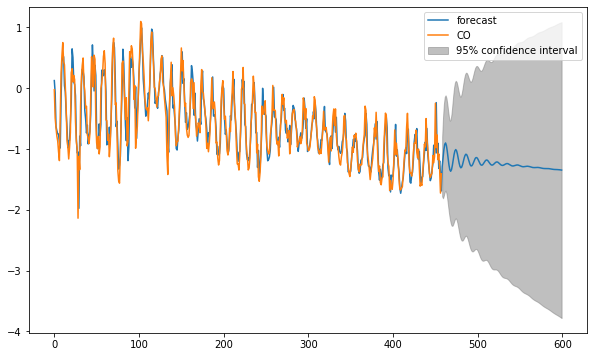

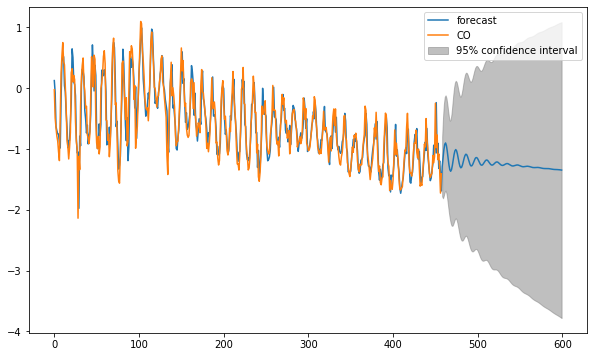

In [113]:
results_ARIMA.plot_predict(1,600) 